In [33]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
import yaml

RESULTS_DIR = "/home/joshua/dev/nightingale/src/experiments/results/ethos_gpt2"

In [34]:
experiment_config = yaml.load(open(f"{RESULTS_DIR}/config.yaml"), Loader=yaml.FullLoader)
print(experiment_config, "\n")

vocab = pd.read_csv(f"{RESULTS_DIR}/vocab.csv")
print(vocab.head(20))
print(f"Vocab size: {len(vocab)}", "\n")

simulations = pd.read_csv(f"{RESULTS_DIR}/evaluations/icu_mortality_24h/simulations.csv")
print(f"Number of subjects: {len(simulations['subject_id'].unique())}")
print(f"Number of simulations: {len(simulations)}")
simulations.tail(20)

{'data': {'batch_size': 32, 'sequence_length': 2048, 'shuffle': True, 'train_dataset_dir': '/groups/a-faisal/nightingale_data/ehr_tokenisation/ethos/train', 'val_dataset_dir': '/groups/a-faisal/nightingale_data/ehr_tokenisation/ethos/tuning', 'vocab_path': '/groups/a-faisal/nightingale_data/ehr_tokenisation/ethos/vocab.csv'}, 'experiment_metadata': {'start_timestamp': '2025-09-28 12:19:05'}, 'loss_function': {'type': 'cross_entropy'}, 'model': {'bias': True, 'context_length': 2048, 'dropout': 0.3, 'model_dim': 768, 'n_heads': 12, 'n_layers': 6, 'type': 'gpt2', 'vocab_size': 4597}, 'name': 'ethos_gpt2', 'optimiser': {'lr': 0.0006, 'type': 'adam'}, 'training': {'device': 'cuda', 'epochs': 50}} 

    token                str
0       0            BMI//Q1
1       1           BMI//Q10
2       2            BMI//Q2
3       3            BMI//Q3
4       4            BMI//Q4
5       5            BMI//Q5
6       6            BMI//Q6
7       7            BMI//Q7
8       8            BMI//Q8
9      

,subject_id,real_end_token_str,real_end_token_steps,outcome,input_tokens,predicted_tokens,steps_taken
14910,18770465,ICU_DISCHARGE,439,MEDS_DEATH,"[2, 12, 14, 30, 26, 19, 63, 30, 64, 33, 45, 29...","[59, 54, 33, 53, 25, 62, 35, 52, 35, 41, 33, 5...",3725
14911,14239401,ICU_DISCHARGE,3443,max_steps,"[6, 11, 15, 31, 31, 19, 98, 33, 97, 35, 40, 32...","[162, 61, 86, 162, 68, 119, 365, 24, 263, 37, ...",4081
14912,14494683,ICU_DISCHARGE,1573,max_steps,"[10, 11, 16, 32, 31, 23, 376, 25, 136, 32, 138...","[58, 568, 58, 144, 29, 59, 141, 33, 140, 35, 1...",4081
14913,14494683,ICU_DISCHARGE,1573,max_steps,"[10, 11, 16, 32, 31, 23, 376, 25, 136, 32, 138...","[67, 219, 27, 382, 30, 371, 28, 442, 32, 67, 1...",4081
14914,14494683,ICU_DISCHARGE,1573,max_steps,"[10, 11, 16, 32, 31, 23, 376, 25, 136, 32, 138...","[67, 37, 36, 72, 141, 33, 140, 32, 177, 29, 14...",4081
14915,14494683,ICU_DISCHARGE,1573,max_steps,"[10, 11, 16, 32, 31, 23, 376, 25, 136, 32, 138...","[67, 162, 24, 38, 57, 34, 24, 109, 34, 24, 86,...",4081
14916,15949525,ICU_DISCHARGE,451,max_steps,"[3, 11, 13, 30, 30, 23, 66, 25, 40, 27, 44, 26...","[58, 141, 33, 140, 35, 144, 29, 218, 25, 139, ...",4081
14917,16150166,ICU_DISCHARGE,279,max_steps,"[1, 12, 15, 30, 30, 23, 149, 34, 24, 109, 34, ...","[57, 37, 24, 158, 365, 24, 263, 59, 37, 24, 78...",4081
14918,16970621,MEDS_DEATH,452,max_steps,"[9, 11, 14, 29, 26, 23, 221, 25, 96, 25, 222, ...","[90, 305, 31, 270, 33, 88, 33, 89, 35, 93, 31,...",4081
14919,16970621,MEDS_DEATH,452,max_steps,"[9, 11, 14, 29, 26, 23, 221, 25, 96, 25, 222, ...","[57, 141, 26, 140, 25, 144, 35, 139, 25, 136, ...",4081



Overall Accuracy: 80.78% (1206/1493)

Class 0 (Survival):
  Precision: 0.910
  Recall: 0.854
  F1-score: 0.881
  Support: 1245

Class 1 (Mortality):
  Precision: 0.440
  Recall: 0.577
  F1-score: 0.499
  Support: 248

Confusion Matrix:
                 Predicted
                     Survived    Mortality
Actual    Survived    1063         182
          Mortality    105         143


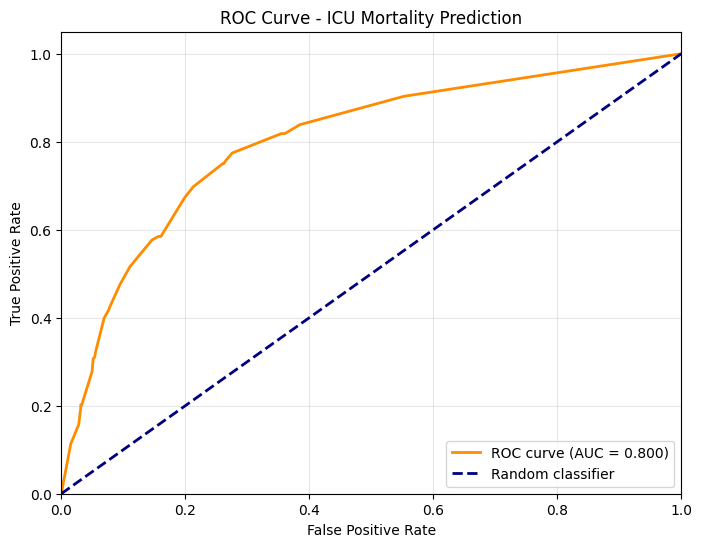


AUC: 0.800


In [35]:
# Calculate accuracy over the dataset
correct_predictions = 0
total_subjects = 0
mortality_predictions = []
true_labels = []

for subject_id in simulations['subject_id'].unique():
    subject_simulations = simulations[simulations['subject_id'] == subject_id]
    num_successful_simulations = len(subject_simulations[subject_simulations['outcome'] != "max_steps"])
    if num_successful_simulations == 0:
        continue
    num_mortality_predictions = 0
    
    # Count mortality predictions for this subject
    for _, row in subject_simulations.iterrows():
        if row['outcome'] == "MEDS_DEATH":
            num_mortality_predictions += 1
    
    # Calculate mortality prediction probability
    mortality_prediction = num_mortality_predictions / num_successful_simulations
    
    # Determine true outcome (1 if died, 0 if didn't die)
    true_mortality = 1 if subject_simulations['real_end_token_str'].iloc[0] == 'MEDS_DEATH' else 0
    
    # Store for ROC curve
    mortality_predictions.append(mortality_prediction)
    true_labels.append(true_mortality)
    
    # Check if prediction is correct
    predicted_mortality = 1 if mortality_prediction >= 0.5 else 0
    is_correct = predicted_mortality == true_mortality
    
    if is_correct:
        correct_predictions += 1
    total_subjects += 1
    
    # print(f"Subject {subject_id} | mortality_prediction: {mortality_prediction:.3f} | predicted: {predicted_mortality} | true: {true_mortality} | correct: {is_correct}")

# Calculate and print overall accuracy
accuracy = correct_predictions / total_subjects
print(f"\nOverall Accuracy: {accuracy*100:.2f}% ({correct_predictions}/{total_subjects})")

# Calculate precision and recall for each class
from sklearn.metrics import precision_recall_fscore_support, confusion_matrix

# Convert to binary predictions for precision/recall calculation
predicted_labels = [1 if p >= 0.5 else 0 for p in mortality_predictions]

# Calculate precision, recall, and F1 for each class
precision, recall, f1, support = precision_recall_fscore_support(true_labels, predicted_labels, average=None)

print(f"\nClass 0 (Survival):")
print(f"  Precision: {precision[0]:.3f}")
print(f"  Recall: {recall[0]:.3f}")
print(f"  F1-score: {f1[0]:.3f}")
print(f"  Support: {support[0]}")

print(f"\nClass 1 (Mortality):")
print(f"  Precision: {precision[1]:.3f}")
print(f"  Recall: {recall[1]:.3f}")
print(f"  F1-score: {f1[1]:.3f}")
print(f"  Support: {support[1]}")

# Print confusion matrix
cm = confusion_matrix(true_labels, predicted_labels)
print(f"\nConfusion Matrix:")
print(f"                 Predicted")
print(f"                     Survived    Mortality")
print(f"Actual    Survived    {cm[0,0]:4d}        {cm[0,1]:4d}")
print(f"          Mortality   {cm[1,0]:4d}        {cm[1,1]:4d}")

# Plot ROC curve
fpr, tpr, thresholds = roc_curve(true_labels, mortality_predictions)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.3f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', label='Random classifier')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - ICU Mortality Prediction')
plt.legend(loc="lower right")
plt.grid(True, alpha=0.3)
plt.show()

print(f"\nAUC: {roc_auc:.3f}")


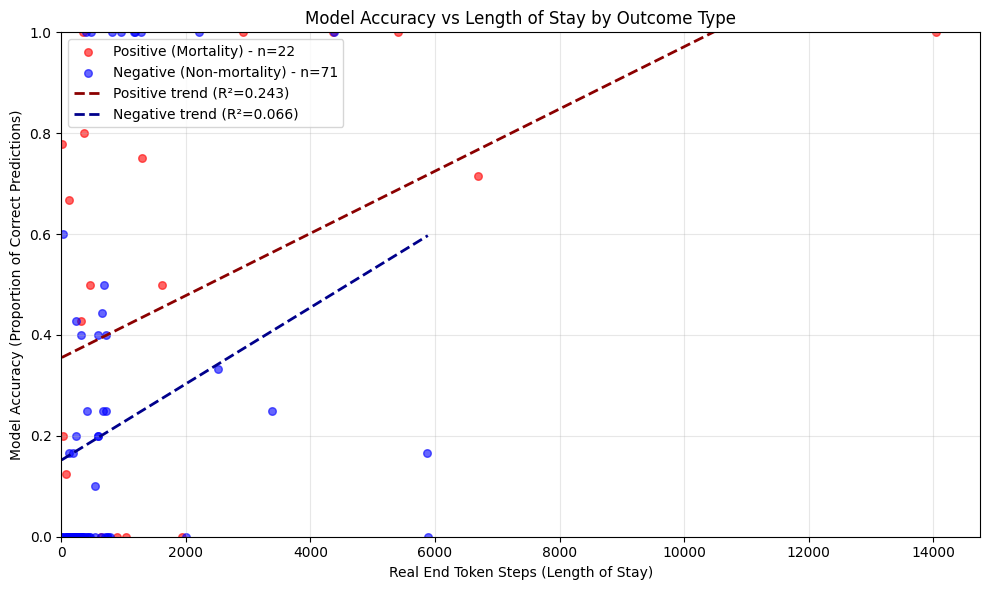

Positive samples: 22
Negative samples: 71
Positive correlation coefficient: 0.493
Negative correlation coefficient: 0.258


In [4]:
# Create scatter plot of accuracy vs real_end_token_steps for positive and negative samples
import numpy as np
from sklearn.linear_model import LinearRegression

# Prepare data for scatter plot
positive_samples = []  # mortality cases
negative_samples = []  # non-mortality cases

for subject_id in simulations['subject_id'].unique():
    subject_simulations = simulations[simulations['subject_id'] == subject_id]
    num_successful_simulations = len(subject_simulations[subject_simulations['outcome'] != "max_steps"])
    
    if num_successful_simulations == 0:
        continue
    
    num_mortality_predictions = 0
    
    # Count mortality predictions for this subject
    for _, row in subject_simulations.iterrows():
        if row['outcome'] == "MEDS_DEATH":
            num_mortality_predictions += 1
    
    # Calculate mortality prediction probability (accuracy for this subject)
    mortality_prediction = num_mortality_predictions / num_successful_simulations
    
    # Get true outcome and real_end_token_steps
    true_mortality = 1 if subject_simulations['real_end_token_str'].iloc[0] == 'MEDS_DEATH' else 0
    real_end_token_steps = subject_simulations['real_end_token_steps'].iloc[0]
    
    # Skip if real_end_token_steps is invalid
    if real_end_token_steps == -1 or pd.isna(real_end_token_steps):
        continue
    
    if true_mortality == 1:
        positive_samples.append((real_end_token_steps, mortality_prediction))
    else:
        negative_samples.append((real_end_token_steps, mortality_prediction))

# Convert to arrays for plotting
pos_x = np.array([x[0] for x in positive_samples])
pos_y = np.array([x[1] for x in positive_samples])
neg_x = np.array([x[0] for x in negative_samples])
neg_y = np.array([x[1] for x in negative_samples])

# Create the plot
plt.figure(figsize=(10, 6))

# Scatter plots
plt.scatter(pos_x, pos_y, alpha=0.6, color='red', label=f'Positive (Mortality) - n={len(positive_samples)}', s=30)
plt.scatter(neg_x, neg_y, alpha=0.6, color='blue', label=f'Negative (Non-mortality) - n={len(negative_samples)}', s=30)

# Fit and plot linear regression lines
if len(positive_samples) > 1:
    pos_reg = LinearRegression().fit(pos_x.reshape(-1, 1), pos_y)
    pos_line_x = np.linspace(pos_x.min(), pos_x.max(), 100)
    pos_line_y = pos_reg.predict(pos_line_x.reshape(-1, 1))
    plt.plot(pos_line_x, pos_line_y, color='darkred', linestyle='--', linewidth=2, 
             label=f'Positive trend (R²={pos_reg.score(pos_x.reshape(-1, 1), pos_y):.3f})')

if len(negative_samples) > 1:
    neg_reg = LinearRegression().fit(neg_x.reshape(-1, 1), neg_y)
    neg_line_x = np.linspace(neg_x.min(), neg_x.max(), 100)
    neg_line_y = neg_reg.predict(neg_line_x.reshape(-1, 1))
    plt.plot(neg_line_x, neg_line_y, color='darkblue', linestyle='--', linewidth=2,
             label=f'Negative trend (R²={neg_reg.score(neg_x.reshape(-1, 1), neg_y):.3f})')

plt.xlabel('Real End Token Steps (Length of Stay)')
plt.ylabel('Model Accuracy (Proportion of Correct Predictions)')
plt.title('Model Accuracy vs Length of Stay by Outcome Type')
plt.legend()
plt.grid(True, alpha=0.3)
plt.xlim(left=0)
plt.ylim(0, 1)
plt.tight_layout()
plt.show()

print(f"Positive samples: {len(positive_samples)}")
print(f"Negative samples: {len(negative_samples)}")
if len(positive_samples) > 1:
    print(f"Positive correlation coefficient: {np.corrcoef(pos_x, pos_y)[0,1]:.3f}")
if len(negative_samples) > 1:
    print(f"Negative correlation coefficient: {np.corrcoef(neg_x, neg_y)[0,1]:.3f}")


In [32]:
subject_id = 18376342
print_width_per_simulation = 30

subject_simulations = simulations[simulations['subject_id'] == subject_id]

input_token_ids = subject_simulations['input_tokens'].values[0]
print(" Input tokens ")
# print([vocab[vocab['token'] == token]['str'].values[0] for token in eval(input_token_ids)])
for i, token in enumerate(eval(input_token_ids)):
    token_str = vocab[vocab['token'] == token]['str'].values[0]
    if len(token_str) > print_width_per_simulation:
        token_str = token_str[:print_width_per_simulation-1]
    print(f"{i+1}: {token_str}")

print("\n---\n")

simulation_strings = []
max_simulation_length = 0
for i, row in subject_simulations.iterrows():
    predicted_tokens = eval(row['predicted_tokens'])
    simulation_strings.append([vocab[vocab['token'] == token]['str'].values[0] for token in predicted_tokens])
    max_simulation_length = max(max_simulation_length, len(simulation_strings[-1]))

header_string = ""
for i in range(len(subject_simulations)):
    header_string += f"Sim {i+1}".ljust(print_width_per_simulation)
print(header_string)

for i in range(max_simulation_length):
    row_string = ""
    for simulation_string in simulation_strings:
        if len(simulation_string) > i:
            token_str = simulation_string[i]
            # Truncate if too long, ensuring at least 1 space between columns
            if len(token_str) >= print_width_per_simulation:
                token_str = token_str[:print_width_per_simulation-1]
            row_string += token_str.ljust(print_width_per_simulation)
        else:
            row_string += "-".ljust(print_width_per_simulation)
    print(row_string)

 Input tokens 
1: BMI//UNKNOWN
2: GENDER//F
3: MARITAL//SINGLE
4: Q7
5: Q2
6: RACE//BLACK
7: LAB//51265//K/UL
8: Q2
9: LAB//51277//%
10: Q9
11: LAB//51279//M/UL
12: Q7
13: LAB//51301//K/UL
14: Q7
15: LAB//50868//MEQ/L
16: Q9
17: LAB//50882//MEQ/L
18: Q3
19: LAB//50893//MG/DL
20: Q3
21: LAB//50902//MEQ/L
22: Q1
23: LAB//50912//MG/DL
24: Q9
25: LAB//50931//MG/DL
26: Q1
27: LAB//50960//MG/DL
28: Q4
29: LAB//50970//MG/DL
30: Q10
31: LAB//50971//MEQ/L
32: Q10
33: LAB//50983//MEQ/L
34: Q1
35: LAB//51006//MG/DL
36: Q9
37: 12h-18h
38: ICD//PCS//5
39: ICD//PCS//A
40: ICD//PCS//1
41: ICD//PCS//D
42: ICD//PCS//0
43: ICD//PCS//0
44: ICD//PCS//Z
45: 5h-8h
46: LAB//50868//MEQ/L
47: Q9
48: LAB//50882//MEQ/L
49: Q1
50: LAB//50893//MG/DL
51: Q2
52: LAB//50902//MEQ/L
53: Q1
54: LAB//50912//MG/DL
55: Q9
56: LAB//50931//MG/DL
57: Q9
58: LAB//50960//MG/DL
59: Q4
60: LAB//50970//MG/DL
61: Q10
62: LAB//50971//MEQ/L
63: Q10
64: LAB//50983//MEQ/L
65: Q1
66: LAB//51006//MG/DL
67: Q9
68: LAB//51143//%
69: Q1
70: